In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
np.set_printoptions(threshold=sys.maxsize)

np.random.seed(14)

from sim_functions import *
from positioning import *
from system_parameters import *
from optimum_solution import *
from esnp_algorithms import *
from gt_power_control import *

In [2]:
# System constant parameters

num_ue, num_ap, num_ch = 4, 4, 1
                    
tot_band = 100e6 # [W]
env_constant = 10e-4
pl_constant = 4 

cov_side = 100 # [m]

pmin, pmax, step = 0, 30, 1 # [dBm]

In [3]:
# Study case dataset

ap_pos = ap_positions(num_ap, cov_side)

ue_pos = np.array([[22.538 + 20.333j], 
                   [56.679 + 32.188j], 
                   [76.551 + 14.688j], 
                   [26.595 + 70.239j]])

dis_matrix = distance(ue_pos, ap_pos)

shadowing_matrix = np.array([[5.3434e-2, 2.8731e-1, 1.9691e-2, 7.3013e-1], 
                             [3.2318, 1.5770, 2.6449e-1, 5.6379], 
                             [6.1470e-3, 1.1424, 2.6826e-1, 4.5709], 
                             [1.3485e-1, 4.6690e-1, 7.8250e-1, 1.6742]])

# I dunno why rayleigh_matrix has to have shape (num_ch, num_ue, num_ap) but for operation I'm doing, it works.

rayleigh_matrix = np.array([[1.248699, 3.248041, 0.772754, 0.708962], 
                            [0.498887, 0.104890, 0.647280, 0.940906], 
                            [0.382966, 0.682700, 1.891256, 0.327100], 
                            [0.065737, 0.649500, 1.981107, 1.259538]]).reshape(((num_ch, num_ue, num_ap)))

In [4]:
# Simulation

# Channel matrix is constant as distance, shadowing and fast fading matrixes are constant
channel_matrix = get_channel(dis_matrix, shadowing_matrix, np.sqrt(rayleigh_matrix))

# Set of all vectors of power possible in system
power_set = available_power_vec(pmin, pmax, step, num_ue)

# Noise power in system is constant
n_power = get_noise(tot_band, num_ch)

In [5]:
# ESNP algorithm

sinr_esnp_maxmin = esnp_maxmin(channel_matrix, pmax, pmin, step, 10, 0.5, 1000, n_power)

sinr_esnp_maxsum = esnp_maxsum(channel_matrix, pmax, pmin, step, 10, 0.5, 1000, n_power)

sinr_esnp_maxprod = esnp_maxproduct(channel_matrix, pmax, pmin, step, 10, 0.5, 1000, n_power)

print('maxmin: ', lin2db(np.min(sinr_esnp_maxmin[0])))
print(sinr_esnp_maxmin[1])
print('maxsum: ', lin2db(np.sum(sinr_esnp_maxsum[0])))
print(sinr_esnp_maxsum[1])
print('maxproduct: ', lin2db(np.sum(sinr_esnp_maxprod[0])*np.min(sinr_esnp_maxprod[0])))
print(sinr_esnp_maxprod[1])

maxmin:  -0.2898172049129422
[12. 30. 13. 22.]
maxsum:  53.85671749976571
[ 0.  0.  0. 30.]
maxproduct:  52.5002803408903
[ 0. 18.  7. 30.]


In [6]:
# Optimum values

# opt_maxmin = 0
# opt_summax = 0
# opt_maxprod = 0

# for vec in range(len(power_set)):

#     # Update the values in order to maximize each objective function
#     opt_maxmin = np.max([opt_maxmin, np.min(get_sinr(power_set[vec], channel_matrix, n_power))])
#     opt_summax = np.max([opt_summax, np.sum(get_sinr(power_set[vec], channel_matrix, n_power))])
#     opt_maxprod = np.max([opt_maxprod, (np.sum(get_sinr(power_set[vec], channel_matrix, n_power))
#                                         * np.min(get_sinr(power_set[vec], channel_matrix, n_power)))]) 

In [7]:
# print('maxmin: ', lin2db(opt_maxmin))
# print('maxsum: ', lin2db(opt_summax))
# print('maxprod: ', lin2db(opt_maxprod))

Optimum solution

maxmin:  -0.28882313317110436

maxsum:  53.85671749976571

maxprod:  52.518605576706754

In [14]:
# Game-based power allocation strategy

alpha = 0.1
epsilon = 0.5

power_game = game_pas(20, alpha, num_ue, epsilon, channel_matrix)

sinr_game = get_sinr(power_game[0], channel_matrix, n_power)

p_evolution = np.array(power_game[1])

# Mancho, o passo em que ele faz o mu do passado menos o mu da potencia minima sempre passam todos... ou seja, o mu_passado é sempre maior que o mu_p*; então tá sempre minimizando os valores até chegar no
# mínimo estabelecido. A função de payoff é menor quanto menor é o valor de potência, o que não faz sentido! 


 1
2.7965098742760404
0.42300482352456825
1.2260355367350204
5.521489102764565

 2
1.4876209392750077
6.685074728842616
1.9615011865795102
0.8752407060073155

 3
2.6575489131379317
1.2940622315368762
2.2429824685878774
2.4338686894425408

 4
2.1056772290634775
2.681311922612821
2.0938380587799053
1.8844731367128968

 5
2.3311730485239295
2.1229730214148983
2.1555430326698257
2.0356121616330007

 6
2.237368896442659
2.316496385754583
2.1276021580550033
1.9931329881229463

 7
2.274856222970584
2.2452621659198044
2.139741783620315
2.004008810334181

 8
2.259972599264909
2.271098827793601
2.1345046385291475
2.001590305391111

 9
2.2658001376069254
2.261624228052696
2.1367190496786854
2.001939532322922

 10
2.2635334891962122
2.265101673261025
2.1357959302254628
2.0019954485505274

 11
2.2644093114512227
2.2638205178644144
2.1361754007540554
2.001911635018888

 12
2.2640724254951436
2.2642935085638616
2.1360212064886177
2.0019642225945082

 13
2.264201514133644
2.2641185024600263
2.1360832

/home/matheuscarneiro/Documents/Iniciação Científica/power-control/sim_functions.py:10: RuntimeWarning: divide by zero encountered in log10
  return 10.0*np.log10(x)+30.0
/home/matheuscarneiro/Documents/Iniciação Científica/power-control/gt_power_control.py:24: RuntimeWarning: divide by zero encountered in divide
  inv_interference += 1/(dbm2lin(power_vec[i_ue]) * channel[:, i_ue, better_ch[ue]]**alpha)
/home/matheuscarneiro/Documents/Iniciação Científica/power-control/gt_power_control.py:27: RuntimeWarning: divide by zero encountered in divide
  inv_interference -= 1/interest
/home/matheuscarneiro/Documents/Iniciação Científica/power-control/gt_power_control.py:27: RuntimeWarning: invalid value encountered in subtract
  inv_interference -= 1/interest
/home/matheuscarneiro/Documents/Iniciação Científica/power-control/gt_power_control.py:30: RuntimeWarning: divide by zero encountered in divide
  gamma = interference / interest


In [9]:
p_evolution

array([[ 2.00000000e+01,  2.00000000e+01,  2.00000000e+01,
         2.00000000e+01],
       [ 1.60748021e+01,  1.84919785e+01,  1.72886352e+01,
         1.45005401e+01],
       [ 1.29012151e+01,  1.44324260e+01,  1.36647636e+01,
         1.17804277e+01],
       [ 9.41373001e+00,  1.12787916e+01,  1.03332002e+01,
         8.16400694e+00],
       [ 6.05503826e+00,  7.79496532e+00,  6.91877718e+00,
         4.83906286e+00],
       [ 2.64408599e+00,  4.43102513e+00,  3.52751959e+00,
         1.42032402e+00],
       [-7.45984823e-01,  1.02330592e+00,  1.30469750e-01,
        -1.96846900e+00],
       [-4.14431622e+00, -2.36839838e+00, -3.26539157e+00,
        -5.36672522e+00],
       [-7.53940707e+00, -5.76597750e+00, -6.66135735e+00,
        -8.76203142e+00],
       [-1.09357610e+01, -9.16139709e+00, -1.00574011e+01,
        -1.21582413e+01],
       [-1.43316252e+01, -1.25576121e+01, -1.34533754e+01,
        -1.55541809e+01],
       [-1.77276784e+01, -1.59535336e+01, -1.68493895e+01,
      

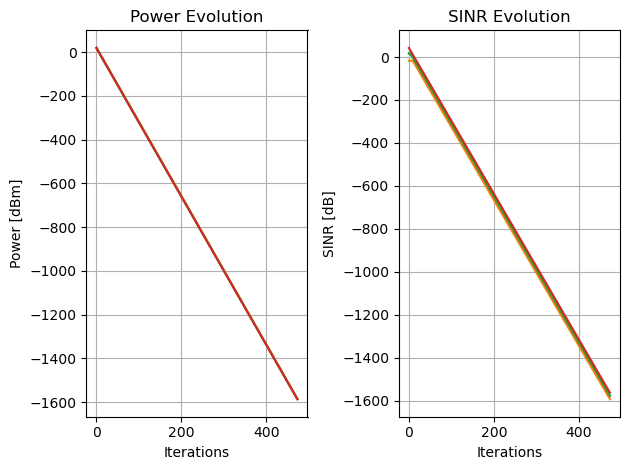

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2)
     
sinr_evolution = np.zeros(p_evolution.shape)
     
for iter in range(p_evolution.shape[0]):
     
     sinr_evolution[iter, :] = lin2db(get_sinr(p_evolution[iter, :], channel_matrix, n_power))

for ue in range(num_ue):
     
     ax1.plot(np.arange(p_evolution.shape[0]), p_evolution[:, ue])
     ax2.plot(np.arange(p_evolution.shape[0]), sinr_evolution[:, ue])          
     
ax1.set_title('Power Evolution') 
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Power [dBm]')
ax1.grid(visible=True)

ax2.set_title('SINR Evolution') 
ax2.set_xlabel('Iterations')
ax2.set_ylabel('SINR [dB]')
ax2.grid(visible=True)

plt.tight_layout()